# map_raster examples 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 

In [2]:
from tests.tools_test import fake_dataset,fake_ecmwf_0100_1h,build_footprint

# I - Not crossing Meridian

## generate fake raster (ECMWF-like )


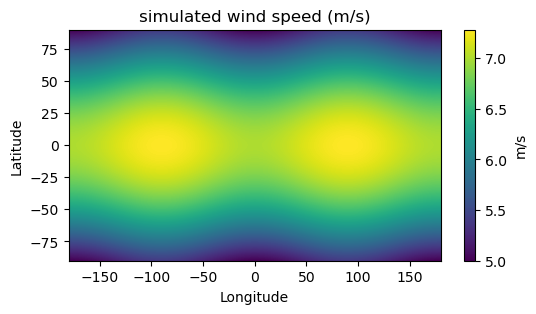

In [3]:
crossAntiMeridian = False
to180 = True



raster = fake_ecmwf_0100_1h(to180=to180,with_nan=False)
plt.figure(figsize=(6,3))
plt.pcolormesh(raster.x, raster.y, np.sqrt(raster.U10**2+raster.V10**2)) 
plt.title("simulated wind speed (m/s)")
plt.colorbar(label='m/s')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## generate fake SAR data + footprint 

In [4]:
dataset = fake_dataset(cross_antimeridian=crossAntiMeridian)
dataset

footprint = build_footprint(dataset)

xs, ys = np.array(footprint.exterior.xy[0]), footprint.exterior.xy[1]   
xlims = (np.min(xs), np.max(xs))
ylims = (np.min(ys), np.max(ys))

In [5]:
xs

array([-30.  , -15.25, -21.13, -35.88, -30.  ])

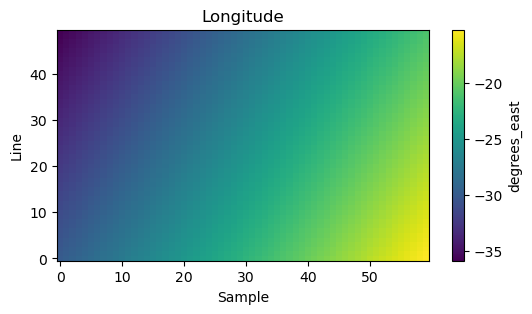

In [6]:
plt.figure(figsize=(6,3))
plt.pcolormesh(dataset.sample, dataset.line, dataset.longitude) 

plt.title("Longitude")
plt.colorbar(label='degrees_east')
plt.xlabel("Sample")
plt.ylabel("Line")
plt.show()

## map_raster main usage example

In [7]:
from mapraster.main import map_raster

In [8]:
rastered = map_raster(raster_ds=raster,originalDataset=dataset, footprint=footprint, cross_antimeridian=crossAntiMeridian)
dataset["U10"] = rastered["U10"]
dataset["V10"] = rastered["V10"]

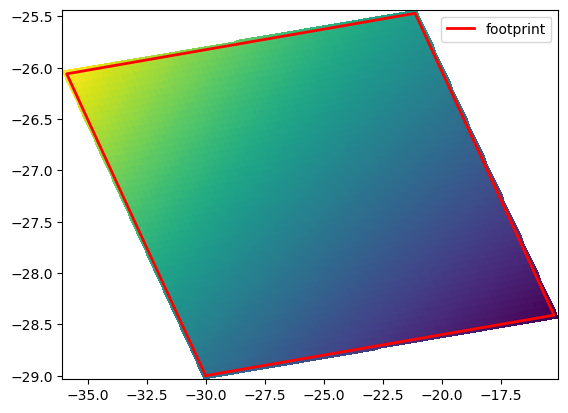

In [9]:
plt.pcolormesh(dataset.longitude, dataset.latitude, np.sqrt(dataset.U10**2+dataset.V10**2))
#plot footprint
plt.plot(xs, ys, color='red', linewidth=2, label =  'footprint'
         )
plt.legend()    

# II - Crossing Meridian

Need to activate crossAntimeridian = True and to display longitudes in [0,360]

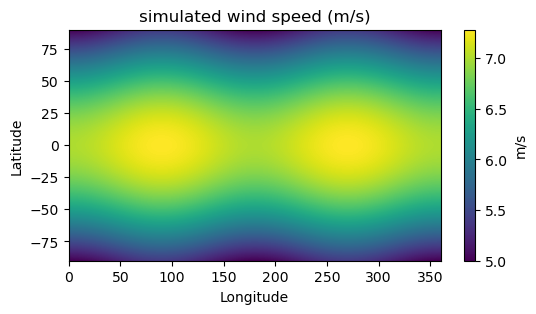

In [10]:
crossAntiMeridian = True
to180 = False

raster = fake_ecmwf_0100_1h(to180=to180,with_nan=False)
plt.figure(figsize=(6,3))
plt.pcolormesh(raster.x, raster.y, np.sqrt(raster.U10**2+raster.V10**2)) 
plt.title("simulated wind speed (m/s)")
plt.colorbar(label='m/s')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [11]:
dataset = fake_dataset(cross_antimeridian=crossAntiMeridian)
dataset

footprint = build_footprint(dataset)

xs, ys = np.array(footprint.exterior.xy[0])%360, footprint.exterior.xy[1]   
xlims = (np.min(xs), np.max(xs))
ylims = (np.min(ys), np.max(ys))

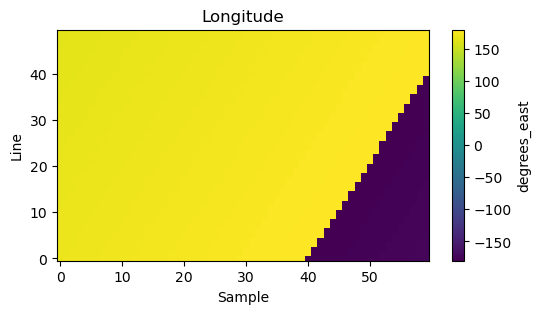

In [12]:
plt.figure(figsize=(6,3))
plt.pcolormesh(dataset.sample, dataset.line, dataset.longitude) 

plt.title("Longitude")
plt.colorbar(label='degrees_east')
plt.xlabel("Sample")
plt.ylabel("Line")
plt.show()

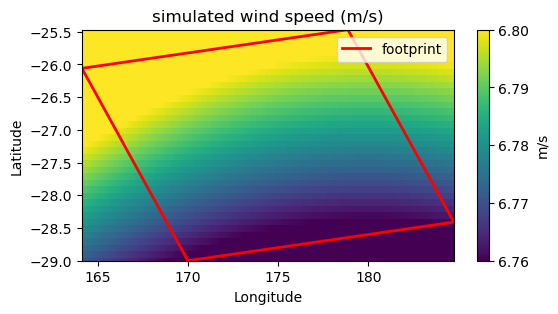

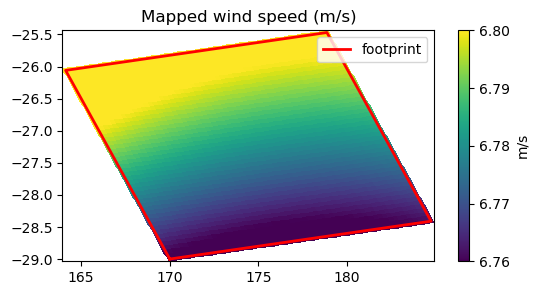

In [13]:
plt.figure(figsize=(6,3))
plt.pcolormesh(raster.x, raster.y, np.sqrt(raster.U10**2+raster.V10**2), vmin = 6.76, vmax=6.8) 
plt.title("simulated wind speed (m/s)")
plt.colorbar(label='m/s')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(np.min(xlims), np.max(xlims))
plt.ylim(np.min(ylims), np.max(ylims))
#plot footprint
plt.plot(xs, ys, color='red', linewidth=2, label =  'footprint')
plt.legend(loc = 'upper right')
plt.show()



rastered = map_raster(raster_ds=raster,originalDataset=dataset, footprint=footprint, cross_antimeridian=crossAntiMeridian)
dataset["U10"] = rastered["U10"]
dataset["V10"] = rastered["V10"]
plt.figure(figsize=(6,3))

plt.pcolormesh(dataset.longitude%360, dataset.latitude, np.sqrt(dataset.U10**2+dataset.V10**2), vmin = 6.76, vmax=6.8)
#plot footprint
plt.plot(xs, ys, color='red', linewidth=2, label =  'footprint')
plt.title("Mapped wind speed (m/s)") 
plt.colorbar(label='m/s')
plt.legend(loc = 'upper right')


In [14]:
# Same with Nans 

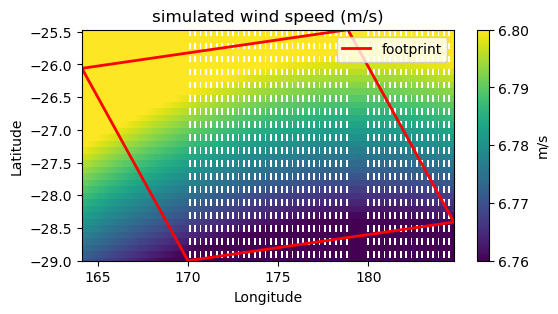

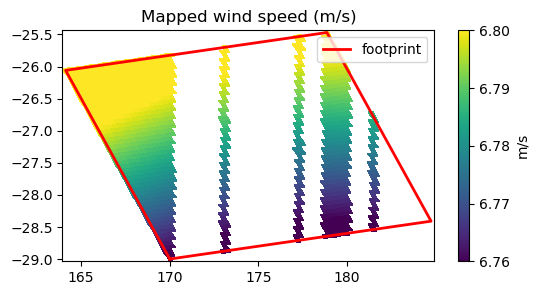

In [16]:
crossAntiMeridian = True
to180 = False

raster = fake_ecmwf_0100_1h(to180=to180,with_nan=True)
plt.figure(figsize=(6,3))
plt.pcolormesh(raster.x, raster.y, np.sqrt(raster.U10**2+raster.V10**2), vmin = 6.76, vmax=6.8) 
plt.title("simulated wind speed (m/s)")
plt.colorbar(label='m/s')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(np.min(xlims), np.max(xlims))
plt.ylim(np.min(ylims), np.max(ylims))
#plot footprint
plt.plot(xs, ys, color='red', linewidth=2, label =  'footprint')
plt.legend(loc = 'upper right')
plt.show()



rastered = map_raster(raster_ds=raster,originalDataset=dataset, footprint=footprint, cross_antimeridian=crossAntiMeridian)
dataset["U10"] = rastered["U10"]
dataset["V10"] = rastered["V10"]
plt.figure(figsize=(6,3))

plt.pcolormesh(dataset.longitude%360, dataset.latitude, np.sqrt(dataset.U10**2+dataset.V10**2), vmin = 6.76, vmax=6.8)
#plot footprint
plt.plot(xs, ys, color='red', linewidth=2, label =  'footprint')
plt.title("Mapped wind speed (m/s)") 
plt.colorbar(label='m/s')
plt.legend(loc = 'upper right')

